**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [52]:
#import neccessary tools and the csv file "TotalTrafo.csv"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [53]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo1)

pandas.core.series.Series

In [54]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo1']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

X = data.drop(['Trafo1','datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Trafo2  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
0      17.86        1     -4.70       2.2       -5.23      1012        97   
1      19.58        1     -5.20       2.7       -4.92      1012        94   
2      18.18        1     -5.70       2.0       -5.48      1012        92   
3      16.83        1     -5.00       1.7       -5.10      1012        93   
4      17.54        1     -4.64       0.0       -5.64      1012        93   
...      ...      ...       ...       ...         ...       ...       ...   
8755   26.88        1     -2.30       8.4       -1.54      1016        41   
8756   20.86        1     -3.00       7.8       -3.70      1017        48   
8757   12.54        1     -2.20       7.1       -0.42      1018        60   
8758   20.61        1     -2.30       6.9       -1.94      1019        53   
8759   17.41        1     -2.50       6.9       -2.17      1020        53   

      Wind Speed      hour_sin  hour_cos  
0           1.18  0.000000e+00  

In [55]:
data.Trafo1.shape

(8760,)

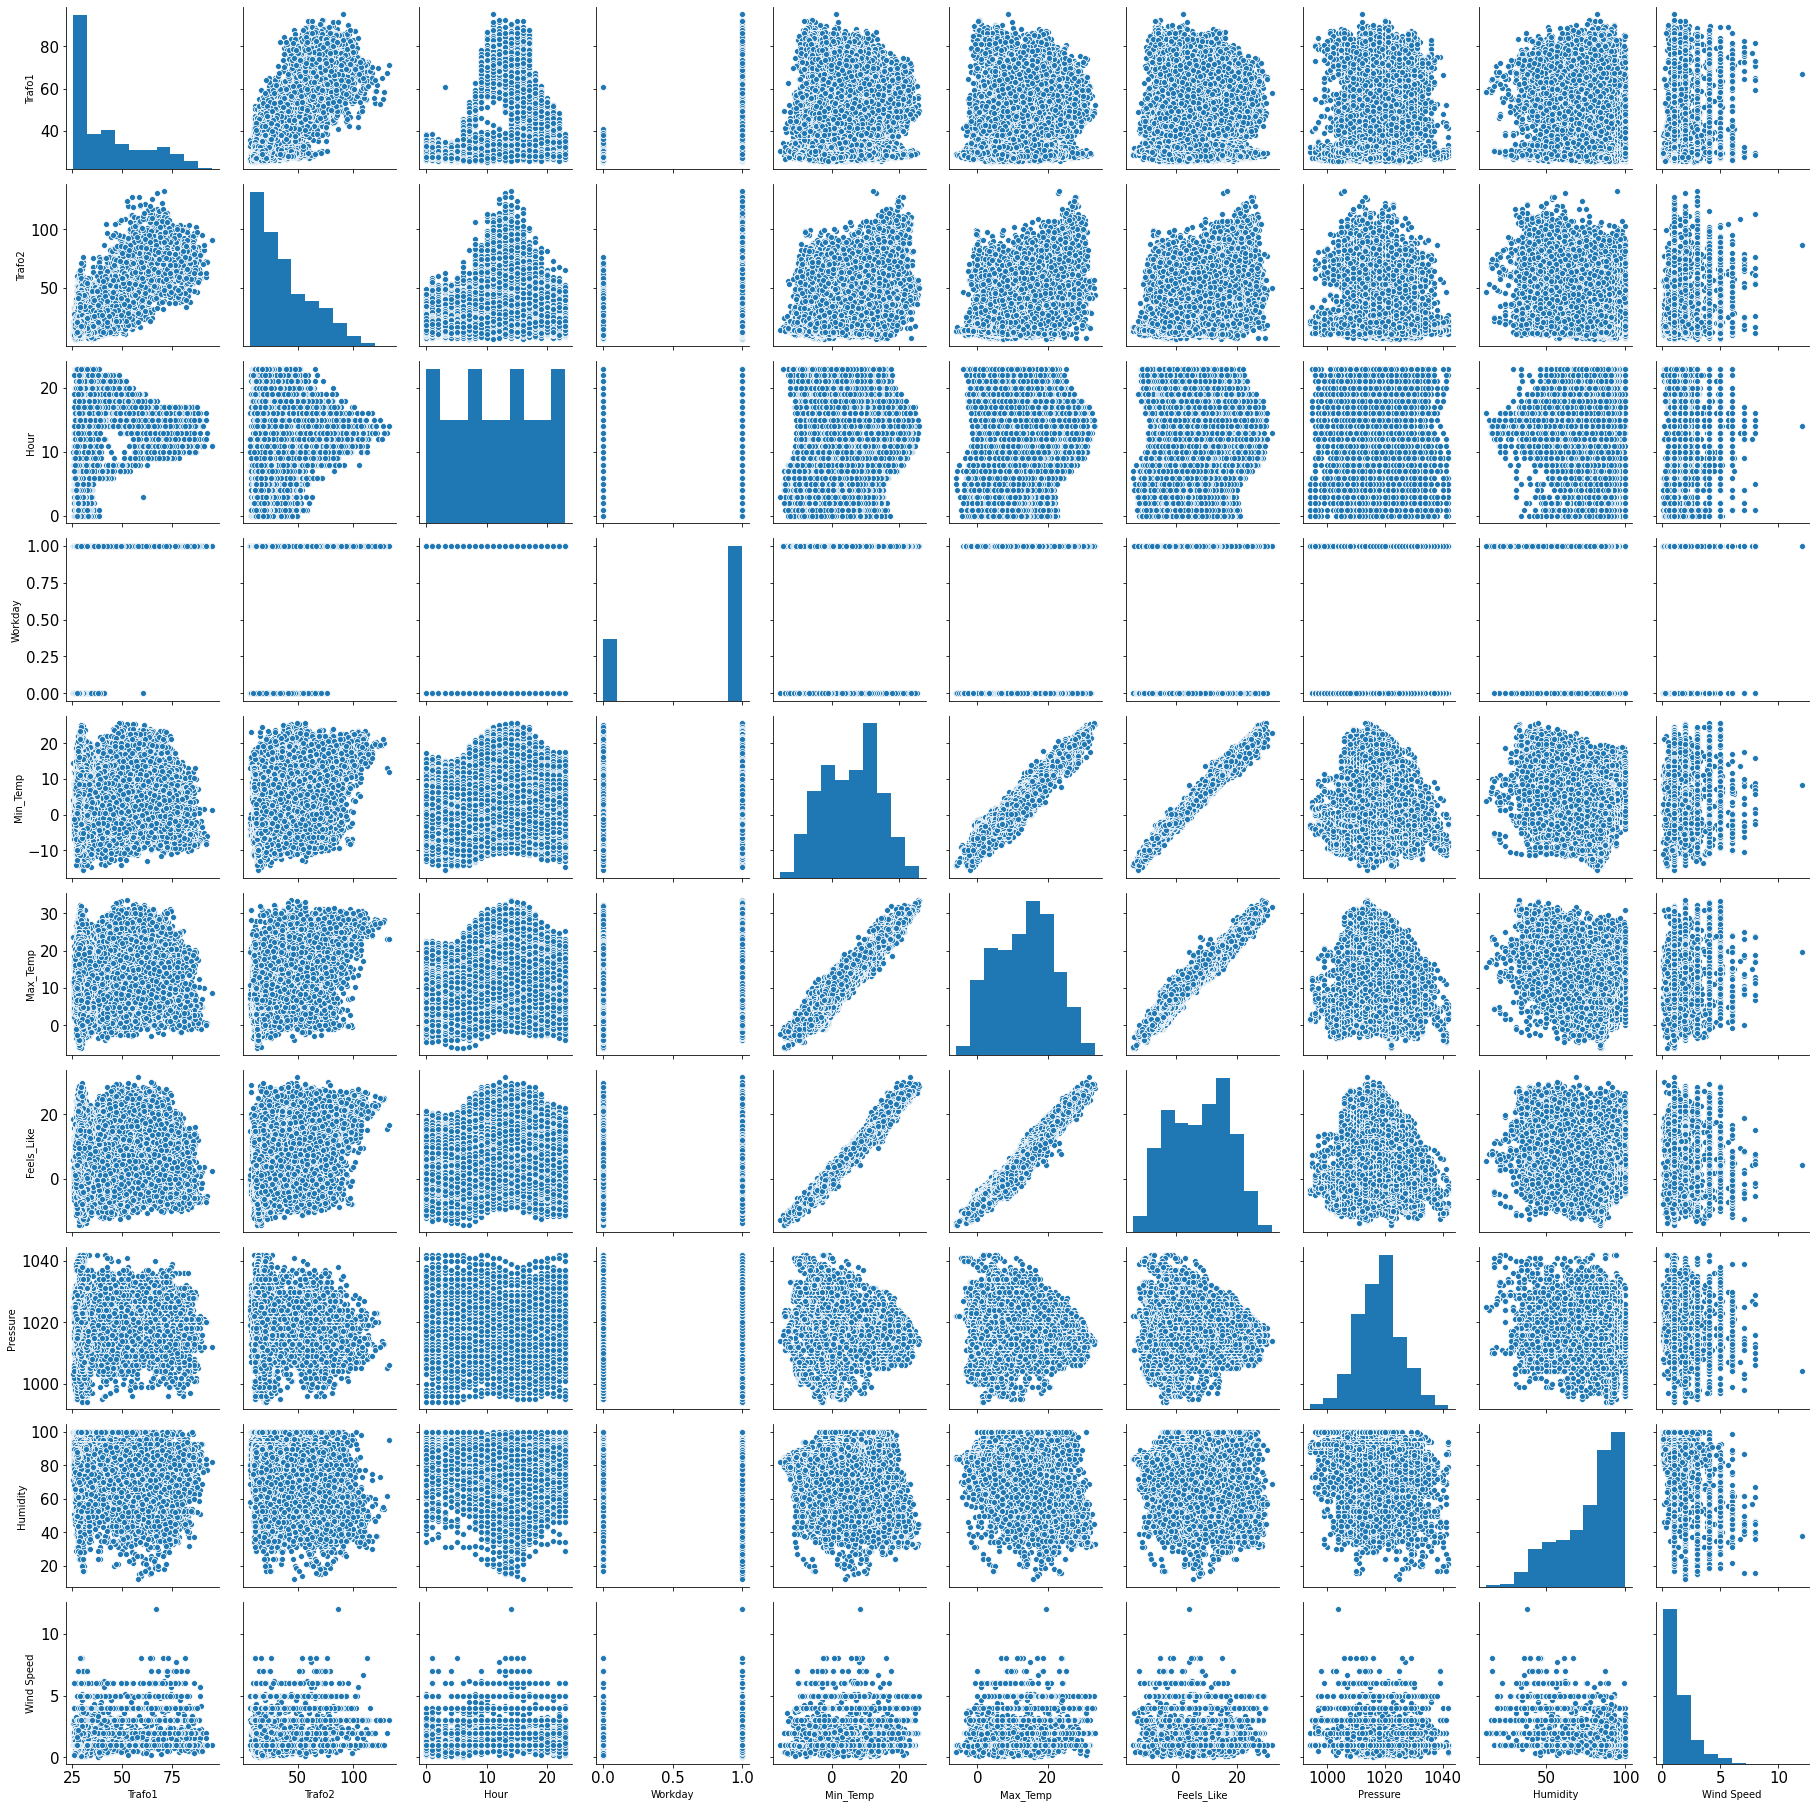

In [56]:
Visuals = sns.pairplot(data, vars = ["Trafo1","Trafo2","Hour","Workday","Min_Temp","Max_Temp","Feels_Like","Pressure","Humidity","Wind Speed"])

In [57]:
data['Trafo1']

0       29.31
1       29.06
2       30.40
3       30.02
4       30.91
        ...  
8755    49.54
8756    42.37
8757    40.58
8758    38.14
8759    29.18
Name: Trafo1, Length: 8760, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
#regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

dt.fit(X_train, Y_train)

In [47]:
predictions = regr_2.predict(X_test)
len(predictions)

NameError: name 'regr_2' is not defined

In [42]:
print(X_test)

      Trafo2  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
1246   15.23        1       6.1     12.00        8.30      1014       100   
293    14.27        0      -3.0      3.60       -2.93      1024       100   
2347   40.38        0      11.0     20.00       12.65      1018        67   
6830   22.02        1      -8.8      1.67       -6.18      1029        56   
1729   50.30        1      11.5     17.60       14.84      1013       100   
...      ...      ...       ...       ...         ...       ...       ...   
4915   27.20        1       7.5     11.70        8.02      1023        86   
8230   20.86        0       1.9      7.10        2.17      1012        78   
1390   34.75        1      10.7     15.20       13.28      1016        99   
8142   12.67        1      -5.2      9.20       -4.24      1019        79   
3107   53.44        1      20.0     27.50       21.93      1020        51   

      Wind Speed  hour_sin  hour_cos  
1246        1.00 -0.269797  0.962917

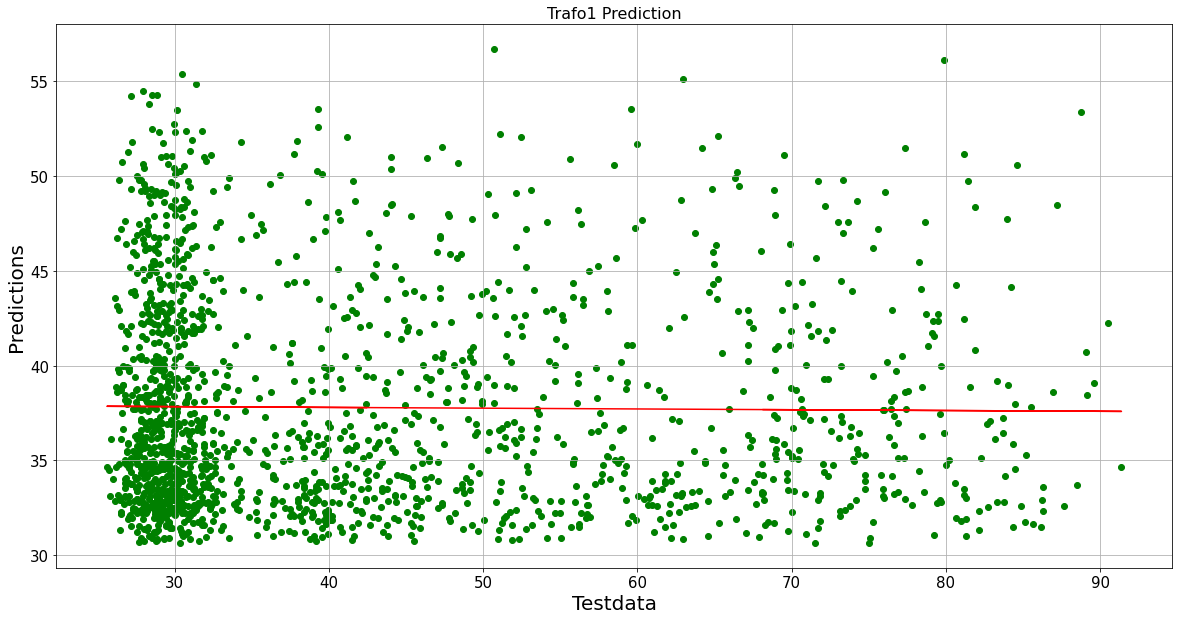

In [43]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(Y_test, predictions, color='green')
plt.title('Trafo1 Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata", fontsize=20)
plt.ylabel("Predictions", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-r')

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(Y_test, predictions)
RMSE1 = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE1 = round(RMSE1, 2)
MAE1 = round(MAE1, 4)

In [45]:
txt1 = "The R2 score is {MAE1}".format(MAE1 = MAE1)
txt2 = "With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of \033[1m {RMSE1} kW".format(RMSE1 = RMSE1)

print(txt1)
print(txt2)



The R2 score is -0.1953
With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of  18.14 kW
